In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

pd.set_option('display.max_columns', 145)
pd.set_option("display.max_rows", None)

##Agg

In [ ]:
df = pd.read_csv('completedtable.csv')
df.head()

,platformgameid,gametime,team1id,team2id,player1id,player2id,player3id,player4id,player5id,player6id,player7id,player8id,player9id,player10id,finalgold_p1,kills_p1,deaths_p1,assists_p1,damagetochamps_p1,damagetaken_p1,turretdamagedealt_p1,finalgold_p2,kills_p2,deaths_p2,assists_p2,damagetochamps_p2,damagetaken_p2,turretdamagedealt_p2,finalgold_p3,kills_p3,deaths_p3,assists_p3,damagetochamps_p3,damagetaken_p3,turretdamagedealt_p3,finalgold_p4,kills_p4,deaths_p4,assists_p4,damagetochamps_p4,damagetaken_p4,turretdamagedealt_p4,finalgold_p5,kills_p5,deaths_p5,assists_p5,damagetochamps_p5,damagetaken_p5,turretdamagedealt_p5,finalgold_p6,kills_p6,deaths_p6,assists_p6,damagetochamps_p6,damagetaken_p6,turretdamagedealt_p6,finalgold_p7,kills_p7,deaths_p7,assists_p7,damagetochamps_p7,damagetaken_p7,turretdamagedealt_p7,finalgold_p8,kills_p8,deaths_p8,assists_p8,damagetochamps_p8,damagetaken_p8,turretdamagedealt_p8,finalgold_p9,kills_p9,...,towerskilled_team2,dragonskilled_team2,baronskilled_team2,firstheraldteam,firstdragonteam,firstdragon_killtime,timetolevel6_p1,timetolevel9_p1,timetolevel11_p1,timetolevel6_p2,timetolevel9_p2,timetolevel11_p2,timetolevel6_p3,timetolevel9_p3,timetolevel11_p3,timetolevel6_p4,timetolevel9_p4,timetolevel11_p4,timetolevel6_p5,timetolevel9_p5,timetolevel11_p5,timetolevel6_p6,timetolevel9_p6,timetolevel11_p6,timetolevel6_p7,timetolevel9_p7,timetolevel11_p7,timetolevel6_p8,timetolevel9_p8,timetolevel11_p8,timetolevel6_p9,timetolevel9_p9,timetolevel11_p9,timetolevel6_p10,timetolevel9_p10,timetolevel11_p10,winningteam,p1idupdated,p2idupdated,p3idupdated,p4idupdated,p5idupdated,p6idupdated,p7idupdated,p8idupdated,p9idupdated,p10idupdated,esportsgameid,tournamentname,startdate,enddate,gametype,leagueid,leaguename,rownumber,team1idupdated,team2idupdated,t1idupdated234,t2idupdated234,finalteam1id,finalteam2id,finalplayer1id,finalplayer2id,finalplayer3id,finalplayer4id,finalplayer5id,finalplayer6id,finalplayer7id,finalplayer8id,finalplayer9id,finalplayer10id,gamedate
0,ESPORTSTMNT01:1370750,2346465,1.002056e+17,1.002056e+17,1.034783e+17,9.956641e+16,1.002056e+17,1.013838e+17,1.002056e+17,9.987135e+16,9.956641e+16,9.956641e+16,9.876798e+16,9.956641e+16,13884,4.0,3.0,0.0,14818.2190,31653.766,4325.4214,13135,3.0,2.0,1.0,13240.5950,22512.857,422.31845,14483,1.0,2.0,3.0,20510.027,29324.701,4418.12200,15460,0.0,4.0,3.0,21964.055,14020.669,6600.23050,8117,0.0,5.0,4.0,4315.6650,16581.111,1718.376500,16032,5.0,1.0,4.0,19994.574,16442.709,2298.8281,13081,2.0,0.0,9.0,12735.9450,29342.822,1187.10830,14654,3.0,1.0,8.0,25946.008,18158.207,2192.0378,19369,6.0,...,8,4,2,200,100,569058,349329.0,653537.0,863964.0,524139,918434.0,1115433.0,353664.0,641843.0,918434.0,521265,901057,1201655.0,613167.0,1091254.0,1507993.0,350253,651819,953324.0,574190,965876.0,1338781.0,333593,630909.0,969212.0,463838,875291.0,1168481.0,483096.0,1089833.0,1534980.0,200,1.034783e+17,9.956641e+16,1.002056e+17,1.013838e+17,1.002056e+17,9.987135e+16,9.956641e+16,9.956641e+16,9.876798e+16,9.956641e+16,103478355185518310,cblol_2020_split1,2020-01-25,2020-05-03,Playoffs,98767991332355509,cblol-brazil,1,1.002056e+17,1.002056e+17,1.002056e+17,1.002056e+17,1.002056e+17,1.002056e+17,1.034783e+17,9.956641e+16,1.002056e+17,1.013838e+17,1.002056e+17,9.987135e+16,9.956641e+16,9.956641e+16,9.876798e+16,9.956641e+16,2020-05-03T18:14:27.102Z
1,ESPORTSTMNT01:1370787,1685399,1.014284e+17,1.002853e+17,1.003043e+17,9.876798e+16,9.892651e+16,9.876798e+16,1.003043e+17,9.876798e+16,1.007543e+17,1.002853e+17,1.002853e+17,1.002056e+17,10174,2.0,1.0,3.0,8089.4585,13105.073,1749.8475,8164,1.0,1.0,6.0,4327.6310,23359.312,747.11660,11679,3.0,4.0,3.0,15874.700,16035.411,1211.57800,10935,2.0,4.0,5.0,8465.323,10568.018,4489.22900,6970,2.0,2.0,7.0,4693.7990,6700.047,446.917880,9894,1.0,1.0,5.0,8556.588,12995.921,3148.7275,9792,2.0,1.0,4.0,7392.7656,15951.217,3463.32280,11484,3.0,3.0,4.0,16865.994,12360.530,5564.1180,14066,5.0,...,9,2,1,100,200,335909,353136.0,637660.0,869094.0,452911,92918

In [ ]:
df.columns

Index(['platformgameid', 'gametime', 'team1id', 'team2id', 'player1id',
       'player2id', 'player3id', 'player4id', 'player5id', 'player6id',
       ...
       'finalplayer2id', 'finalplayer3id', 'finalplayer4id', 'finalplayer5id',
       'finalplayer6id', 'finalplayer7id', 'finalplayer8id', 'finalplayer9id',
       'finalplayer10id', 'gamedate'],
      dtype='object', length=171)

In [ ]:
#Calculate the total number of examples
count = df.isnull().sum().sort_values(ascending=False)

#Return the fraction of a column which is filled with missing values
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)

#Merge count and percent to display
missing = pd.concat([count, percent], axis = 1, keys = ['Count', '%'])

missing.head(30)

,Count,%
player2id,16618,85.659794
p2idupdated,16618,85.659794
p3idupdated,16614,85.639175
p7idupdated,16614,85.639175
player3id,16614,85.639175
player7id,16614,85.639175
player8id,16611,85.623711
p8idupdated,16611,85.623711
player4id,16611,85.623711
p4idupdated,16611,85.623711


In [ ]:
missing = missing.T
df = df.drop(columns=[col for col in df.columns if missing[col]['%']>=20 ], axis=1)
df = df.drop(columns=['rownumber'],axis=1)

In [ ]:
df.head()

,platformgameid,gametime,finalgold_p1,kills_p1,deaths_p1,assists_p1,damagetochamps_p1,damagetaken_p1,turretdamagedealt_p1,finalgold_p2,kills_p2,deaths_p2,assists_p2,damagetochamps_p2,damagetaken_p2,turretdamagedealt_p2,finalgold_p3,kills_p3,deaths_p3,assists_p3,damagetochamps_p3,damagetaken_p3,turretdamagedealt_p3,finalgold_p4,kills_p4,deaths_p4,assists_p4,damagetochamps_p4,damagetaken_p4,turretdamagedealt_p4,finalgold_p5,kills_p5,deaths_p5,assists_p5,damagetochamps_p5,damagetaken_p5,turretdamagedealt_p5,finalgold_p6,kills_p6,deaths_p6,assists_p6,damagetochamps_p6,damagetaken_p6,turretdamagedealt_p6,finalgold_p7,kills_p7,deaths_p7,assists_p7,damagetochamps_p7,damagetaken_p7,turretdamagedealt_p7,finalgold_p8,kills_p8,deaths_p8,assists_p8,damagetochamps_p8,damagetaken_p8,turretdamagedealt_p8,finalgold_p9,kills_p9,deaths_p9,assists_p9,damagetochamps_p9,damagetaken_p9,turretdamagedealt_p9,finalgold_p10,kills_p10,deaths_p10,assists_p10,damagetochamps_p10,damagetaken_p10,turretdamagedealt_p10,playerwithfirstblood,teamwithfirstblood,killdifferential_end,avgflashdiff_b4objectives,avggoldratio_b4objectives,golddifferential_end,totalkills_team1,totaldeaths_team1,totalassists_team1,towerskilled_team1,dragonskilled_team1,baronskilled_team1,totalkills_team2,totaldeaths_team2,totalassists_team2,towerskilled_team2,dragonskilled_team2,baronskilled_team2,firstheraldteam,firstdragonteam,firstdragon_killtime,timetolevel6_p1,timetolevel9_p1,timetolevel11_p1,timetolevel6_p2,timetolevel9_p2,timetolevel11_p2,timetolevel6_p3,timetolevel9_p3,timetolevel11_p3,timetolevel6_p4,timetolevel9_p4,timetolevel11_p4,timetolevel6_p5,timetolevel9_p5,timetolevel11_p5,timetolevel6_p6,timetolevel9_p6,timetolevel11_p6,timetolevel6_p7,timetolevel9_p7,timetolevel11_p7,timetolevel6_p8,timetolevel9_p8,timetolevel11_p8,timetolevel6_p9,timetolevel9_p9,timetolevel11_p9,timetolevel6_p10,timetolevel9_p10,timetolevel11_p10,winningteam,esportsgameid,tournamentname,startdate,enddate,gametype,leagueid,leaguename,finalteam1id,finalteam2id,finalplayer1id,finalplayer2id,finalplayer3id,finalplayer4id,finalplayer5id,finalplayer6id,finalplayer7id,finalplayer8id,finalplayer9id,finalplayer10id,gamedate
0,ESPORTSTMNT01:1370750,2346465,13884,4.0,3.0,0.0,14818.2190,31653.766,4325.4214,13135,3.0,2.0,1.0,13240.5950,22512.857,422.31845,14483,1.0,2.0,3.0,20510.027,29324.701,4418.12200,15460,0.0,4.0,3.0,21964.055,14020.669,6600.23050,8117,0.0,5.0,4.0,4315.6650,16581.111,1718.376500,16032,5.0,1.0,4.0,19994.574,16442.709,2298.8281,13081,2.0,0.0,9.0,12735.9450,29342.822,1187.10830,14654,3.0,1.0,8.0,25946.008,18158.207,2192.0378,19369,6.0,2.0,6.0,23179.717,17203.873,12689.5720,9142,0.0,4.0,13.0,4060.0450,25760.506,1231.84180,8,200,-0.333333,0.000000,1.030551,-0.052411,8,16,11,6,2,0,16,8,40,8,4,2,200,100,569058,349329.0,653537.0,863964.0,524139,918434.0,1115433.0,353664.0,641843.0,918434.0,521265,901057,1201655.0,613167.0,1091254.0,1507993.0,350253,651819,953324.0,574190,965876.0,1338781.0,333593,630909.0,969212.0,463838,875291.0,1168481.0,483096.0,1089833.0,1534980.0,200,103478355185518310,cblol_2020_split1,2020-01-25,2020-05-03,Playoffs,98767991332355509,cblol-brazil,1.002056e+17,1.002056e+17,1.034783e+17,9.956641e+16,1.002056e+17,1.013838e+17,1.002056e+17,9.987135e+16,9.956641e+16,9.956641e+16,9.876798e+16,9.956641e+16,2020-05-03T18:14:27.102Z
1,ESPORTSTMNT01:1370787,1685399,10174,2.0,1.0,3.0,8089.4585,13105.073,1749.8475,8164,1.0,1.0,6.0,4327.6310,23359.312,747.11660,11679,3.0,4.0,3.0,15874.700,16035.411,1211.57800,10935,2.0,4.0,5.0,8465.323,10568.018,4489.22900,6970,2.0,2.0,7.0,4693.7990,6700.047,446.917880,9894,1.0,1.0,5.0,8556.588,12995.921,3148.7275,9792,2.0,1.0,4.0,7392.7656,15951.217,3463.32280,11484,3.0,3.0,4.0,16865.994,12360.530,5564.1180,14066,5.0,2.0,3.0,9974.306,5360.620,9834.0170,7191,1.0,3.0,8.0,4934.3745,12137.304,853.35500,7,200,-0.090909,-0.250000,0.886522,-0.044893,10,12,24,5,2,0,12,10,24,9,2,1,100,200,335909,353136.0,637660.0,869094.0,452911,929189.0,1298898.0,348714.0,635712.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19400 entries, 0 to 19399
Columns: 144 entries, platformgameid to gamedate
dtypes: float64(98), int64(39), object(7)
memory usage: 21.3+ MB


In [ ]:
individ_cols = ['finalgold_p1', 'kills_p1',	'deaths_p1', 'assists_p1', 'damagetochamps_p1',	'damagetaken_p1',	'turretdamagedealt_p1',
                'finalgold_p2',	'kills_p2',	'deaths_p2',	'assists_p2',	'damagetochamps_p2',	'damagetaken_p2',	'turretdamagedealt_p2',
                'finalgold_p3',	'kills_p3',	'deaths_p3',	'assists_p3',	'damagetochamps_p3',	'damagetaken_p3',	'turretdamagedealt_p3',
                'finalgold_p4',	'kills_p4', 'deaths_p4',	'assists_p4',	'damagetochamps_p4',	'damagetaken_p4',	'turretdamagedealt_p4',
                'finalgold_p5',	'kills_p5',	'deaths_p5',	'assists_p5',	'damagetochamps_p5',	'damagetaken_p5',	'turretdamagedealt_p5',
                'finalgold_p6',	'kills_p6',	'deaths_p6',	'assists_p6',	'damagetochamps_p6',	'damagetaken_p6',	'turretdamagedealt_p6',
                'finalgold_p7',	'kills_p7',	'deaths_p7',	'assists_p7',	'damagetochamps_p7',	'damagetaken_p7',	'turretdamagedealt_p7',
                'finalgold_p8',	'kills_p8',	'deaths_p8',	'assists_p8',	'damagetochamps_p8',	'damagetaken_p8',	'turretdamagedealt_p8',
                'finalgold_p9',	'kills_p9',	'deaths_p9',	'assists_p9',	'damagetochamps_p9',	'damagetaken_p9',	'turretdamagedealt_p9',
                'finalgold_p10',	'kills_p10',	'deaths_p10',	'assists_p10',	'damagetochamps_p10',	'damagetaken_p10',	'turretdamagedealt_p10',	'playerwithfirstblood',
                'timetolevel6_p1',	'timetolevel9_p1',	'timetolevel11_p1',
                'timetolevel6_p2',	'timetolevel9_p2',	'timetolevel11_p2',
                'timetolevel6_p3',	'timetolevel9_p3',	'timetolevel11_p3',
                'timetolevel6_p4',	'timetolevel9_p4',	'timetolevel11_p4',
                'timetolevel6_p5',	'timetolevel9_p5',	'timetolevel11_p5',
                'timetolevel6_p6',	'timetolevel9_p6',	'timetolevel11_p6',
                'timetolevel6_p7',	'timetolevel9_p7',	'timetolevel11_p7',
                'timetolevel6_p8',	'timetolevel9_p8',	'timetolevel11_p8',
                'timetolevel6_p9',	'timetolevel9_p9',	'timetolevel11_p9',
                'timetolevel6_p10',	'timetolevel9_p10',	'timetolevel11_p10',
                'finalplayer1id',	'finalplayer2id',	'finalplayer3id',	'finalplayer4id',	'finalplayer5id',	'finalplayer6id',	'finalplayer7id',	'finalplayer8id',	'finalplayer9id',	'finalplayer10id'
                ]

In [ ]:
non_individ_cols = [col for col in df.columns if col not in individ_cols]
team_df = df[non_individ_cols]
team_df = team_df.dropna(subset=['finalteam1id'])
team_df['gamedate'] = pd.to_datetime(team_df['gamedate'])

In [ ]:
team_df.head()

,platformgameid,gametime,teamwithfirstblood,killdifferential_end,avgflashdiff_b4objectives,avggoldratio_b4objectives,golddifferential_end,totalkills_team1,totaldeaths_team1,totalassists_team1,towerskilled_team1,dragonskilled_team1,baronskilled_team1,totalkills_team2,totaldeaths_team2,totalassists_team2,towerskilled_team2,dragonskilled_team2,baronskilled_team2,firstheraldteam,firstdragonteam,firstdragon_killtime,winningteam,esportsgameid,tournamentname,startdate,enddate,gametype,leagueid,leaguename,finalteam1id,finalteam2id,gamedate
0,ESPORTSTMNT01:1370750,2346465,200,-0.333333,0.000000,1.030551,-0.052411,8,16,11,6,2,0,16,8,40,8,4,2,200,100,569058,200,103478355185518310,cblol_2020_split1,2020-01-25,2020-05-03,Playoffs,98767991332355509,cblol-brazil,1.002056e+17,1.002056e+17,2020-05-03 18:14:27.102000+00:00
1,ESPORTSTMNT01:1370787,1685399,200,-0.090909,-0.250000,0.886522,-0.044893,10,12,24,5,2,0,12,10,24,9,2,1,100,200,335909,200,103540398665570593,ljl_spring_2020,2020-02-08,2020-04-19,Playoffs,98767991349978712,ljl-japan,1.014284e+17,1.002853e+17,2020-05-04 09:29:20.636000+00:00
2,ESPORTSTMNT01:1370788,2476663,200,-0.161290,-0.285714,0.924098,-0.036067,13,18,38,9,4,0,18,13,51,11,3,2,100,100,410839,200,103540398665570594,ljl_spring_2020,2020-02-08,2020-04-19,Playoffs,98767991349978712,ljl-japan,1.002853e+17,1.014284e+17,2020-05-04 10:33:50.622000+00:00
3,ESPORTSTMNT01:1390072,1863225,200,-0.411765,0.400000,0.877698,-0.092354,5,12,18,3,0,0,12,5,26,10,5,1,200,200,416562,200,103478355185518314,cblol_2020_split1,2020-01-25,2020-05-03,Playoffs,98767991332355509,cblol-brazil,1.002056e+17,9.956641e+16,2020-05-09 16:41:02.419000+00:00
4,ESPORTSTMNT01:1401595,2382393,100,-0.416667,-0.166667,1.167472,-0.064710,7,17,9,3,4,0,17,7,34,10,2,2,200,100,348619,200,104202471517814528,cblol_split_2_2020,2020-06-06,2020-09-13,Round Robin,98767991332355509,cblol-brazil,1.002056e+17,9.956641e+16,2020-06-06 17:32:13.806000+00:00


In [ ]:
team_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19383 entries, 0 to 19399
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   platformgameid             19383 non-null  object             
 1   gametime                   19383 non-null  int64              
 2   teamwithfirstblood         19383 non-null  int64              
 3   killdifferential_end       19383 non-null  float64            
 4   avgflashdiff_b4objectives  19383 non-null  float64            
 5   avggoldratio_b4objectives  19383 non-null  float64            
 6   golddifferential_end       19383 non-null  float64            
 7   totalkills_team1           19383 non-null  int64              
 8   totaldeaths_team1          19383 non-null  int64              
 9   totalassists_team1         19383 non-null  int64              
 10  towerskilled_team1         19383 non-null  int64              
 11  dr

In [ ]:
def agg_diff(team_df, col, time_period=60):
  td = pd.Timedelta(time_period, "d")

  out = {}

  for i in team_df.index:
    team1 = team_df['finalteam1id'].loc[i]
    team2 = team_df['finalteam2id'].loc[i]
    date = team_df['gamedate'].loc[i]

    #df with team1 games from previous 'time_period days' where they are team1 in others
    temp1_df = team_df[(team_df['finalteam1id']==team1)]
    temp1_df = temp1_df[(date - temp1_df['gamedate'] < td) & (date-temp1_df['gamedate'] > pd.Timedelta(0,"d"))]
    s1 = temp1_df[col]

    #df with team1 games from previous 'time_period' days where they are team2 in others
    temp2_df = team_df[team_df['finalteam2id']==team1]
    temp2_df = temp2_df[(date - temp2_df['gamedate'] < td) & (date-temp2_df['gamedate'] > pd.Timedelta(0,"d"))]
    s2 = -temp2_df[col]

    s = pd.concat([s1,s2])

    if len(s)==0:
      av1 = -1
      std1 = -1
    elif len(s)==1:
      av1 = s.mean()
      std1 = 0
    else:
      av1 = s.mean()
      std1 = s.std()

    temp1_df = team_df[(team_df['finalteam1id']==team2)]
    temp1_df = temp1_df[(date - temp1_df['gamedate'] < td) & (date-temp1_df['gamedate'] > pd.Timedelta(0,"d"))]
    s1 = temp1_df[col]

    temp2_df = team_df[team_df['finalteam2id']==team2]
    temp2_df = temp2_df[(date - temp2_df['gamedate'] < td) & (date-temp2_df['gamedate'] > pd.Timedelta(0,"d"))]
    s2 = -temp2_df[col]

    s = pd.concat([s1,s2])

    if len(s)==0:
      av2 = -1
      std2 = -1
    elif len(s)==1:
      av2 = s.mean()
      std2 = 0
    else:
      av2 = s.mean()
      std2 = s.std()

    out[i]=[av1,std1,av2,std2]

  temp_df = pd.DataFrame(out,columns=team_df.index, index=[col+'av1',col+'std1',col+'av2',col+'std2'])
  temp_df.head()
  out_df = temp_df.T

  return out_df

In [ ]:
#aggs = agg_diff(team_df, 'killdifferential_end')
#aggs

In [ ]:
def agg_ratio(team_df, col, time_period=60):

  td = pd.Timedelta(time_period, "d")

  out = {}

  for i in team_df.index:
    team1 = team_df['finalteam1id'].loc[i]
    team2 = team_df['finalteam2id'].loc[i]
    date = team_df['gamedate'].loc[i]

    temp1_df = team_df[(team_df['finalteam1id']==team1)]
    temp1_df = temp1_df[(date - temp1_df['gamedate'] < td) & (date-temp1_df['gamedate'] > pd.Timedelta(0,"d"))]
    s1 = temp1_df[col]

    temp2_df = team_df[team_df['finalteam2id']==team1]
    temp2_df = temp2_df[(date - temp2_df['gamedate'] < td) & (date-temp2_df['gamedate'] > pd.Timedelta(0,"d"))]
    s2 = 1/temp2_df[col]

    s = pd.concat([s1,s2])

    if len(s)==0:
      av1 = -1
      std1 = -1
    elif len(s)==1:
      av1 = s.mean()
      std1 = 0
    else:
      av1 = s.mean()
      std1 = s.std()

    temp1_df = team_df[(team_df['finalteam1id']==team2)]
    temp1_df = temp1_df[(date - temp1_df['gamedate'] < td) & (date-temp1_df['gamedate'] > pd.Timedelta(0,"d"))]
    s1 = temp1_df[col]

    temp2_df = team_df[team_df['finalteam2id']==team2]
    temp2_df = temp2_df[(date - temp2_df['gamedate'] < td) & (date-temp2_df['gamedate'] > pd.Timedelta(0,"d"))]
    s2 = 1/temp2_df[col]

    s = pd.concat([s1,s2])

    if len(s)==0:
      av2 = -1
      std2 = -1
    elif len(s)==1:
      av2 = s.mean()
      std2 = 0
    else:
      av2 = s.mean()
      std2 = s.std()

    out[i]=[av1,std1,av2,std2]

  temp_df = pd.DataFrame(out,columns=team_df.index, index=[col+'av1',col+'std1',col+'av2',col+'std2'])
  temp_df.head()
  out_df = temp_df.T

  return out_df

In [ ]:
#agg_r = agg_ratio(team_df, 'avggoldratio_b4objectives')
#agg_r

In [ ]:
def agg_team(team_df, col, days=60):

  td = pd.Timedelta(days, "d")

  out = {}

  for i in team_df.index:
    team1 = team_df['finalteam1id'].loc[i]
    team2 = team_df['finalteam2id'].loc[i]
    date = team_df['gamedate'].loc[i]

    #df with team1 games from last 60 days where they are team1 in others
    temp1_df = team_df[(team_df['finalteam1id']==team1)]
    temp1_df = temp1_df[(date - temp1_df['gamedate'] < td) & (date-temp1_df['gamedate'] > pd.Timedelta(0,"d"))]
    s1 = temp1_df[col]
    w1 = len(temp1_df[temp1_df[col]==100])

    #df with team1 games from last 60 days where they are team2 in others
    temp2_df = team_df[team_df['finalteam2id']==team1]
    temp2_df = temp2_df[(date - temp2_df['gamedate'] < td) & (date-temp2_df['gamedate'] > pd.Timedelta(0,"d"))]
    s2 = temp2_df[col]
    w2 = len(temp2_df[temp2_df[col]==200])

    if len(s1)+len(s2)==0:
      wins1 = -1
      games1 = -1
    else:
      wins1 = (w1 + w2)/(len(s1)+len(s2))
      games1 = len(s1) + len(s2)

    temp1_df = team_df[(team_df['finalteam1id']==team2)]
    temp1_df = temp1_df[(date - temp1_df['gamedate'] < td) & (date-temp1_df['gamedate'] > pd.Timedelta(0,"d"))]
    s1 = temp2_df[col]
    w1 = len(temp1_df[temp1_df[col]==100])

    temp2_df = team_df[team_df['finalteam2id']==team2]
    temp2_df = temp2_df[(date - temp2_df['gamedate'] < td) & (date-temp2_df['gamedate'] > pd.Timedelta(0,"d"))]
    s2 = temp2_df[col]
    w2 = len(temp2_df[temp2_df[col]==200])

    if len(s1)+len(s2)==0:
      wins2 = -1
      games2 = -1
    else:
      wins2 = (w1 + w2)/(len(s1)+len(s2))
      games2 = len(s1) + len(s2)

    out[i]=[wins1,games1,wins2,games2]

  temp_df = pd.DataFrame(out,columns=team_df.index, index=[col+'percent1',col+'games1',col+'percent2',col+'games2'])
  temp_df.head()
  out_df = temp_df.T

  return out_df

In [ ]:
#agg_t = agg_team(team_df, 'teamwithfirstblood')
#agg_t.head()

In [ ]:
#create dataset, default cols
data = team_df[['platformgameid','gamedate','leagueid', 'leaguename', 'tournamentname', 'finalteam1id', 'finalteam2id','winningteam']]

In [ ]:
diff_cols = ['killdifferential_end','avgflashdiff_b4objectives','golddifferential_end']# team is negative of other
ratio_cols = ['avggoldratio_b4objectives']#team is multiplicative inverse of other
teamid_cols = ['teamwithfirstblood','firstheraldteam','firstdragonteam','winningteam']#columns are binary 100 or 200

In [ ]:
for col in diff_cols:
  print(col)
  data = data.merge(agg_diff(team_df, col), how='inner', left_index=True, right_index=True)

for col in ratio_cols:
  print(col)
  data = data.merge(agg_ratio(team_df, col), how='inner', left_index=True, right_index=True)

for col in teamid_cols:
  print(col)
  data = data.merge(agg_team(team_df, col), how='inner', left_index=True, right_index=True)

killdifferential_end
avgflashdiff_b4objectives
golddifferential_end
avggoldratio_b4objectives
teamwithfirstblood
firstheraldteam
firstdragonteam
winningteam


In [ ]:
data.head()

,platformgameid,gamedate,leagueid,leaguename,tournamentname,finalteam1id,finalteam2id,winningteam,killdifferential_endav1,killdifferential_endstd1,killdifferential_endav2,killdifferential_endstd2,avgflashdiff_b4objectivesav1,avgflashdiff_b4objectivesstd1,avgflashdiff_b4objectivesav2,avgflashdiff_b4objectivesstd2,golddifferential_endav1,golddifferential_endstd1,golddifferential_endav2,golddifferential_endstd2,avggoldratio_b4objectivesav1,avggoldratio_b4objectivesstd1,avggoldratio_b4objectivesav2,avggoldratio_b4objectivesstd2,teamwithfirstbloodpercent1,teamwithfirstbloodgames1,teamwithfirstbloodpercent2,teamwithfirstbloodgames2,firstheraldteampercent1,firstheraldteamgames1,firstheraldteampercent2,firstheraldteamgames2,firstdragonteampercent1,firstdragonteamgames1,firstdragonteampercent2,firstdragonteamgames2,winningteampercent1,winningteamgames1,winningteampercent2,winningteamgames2
0,ESPORTSTMNT01:1370750,2020-05-03 18:14:27.102000+00:00,98767991332355509,cblol-brazil,cblol_2020_split1,1.002056e+17,1.002056e+17,200,-0.068394,0.413889,0.043539,0.414219,-0.318027,0.728326,0.011905,0.595952,-0.014542,0.083713,0.028331,0.084231,0.998960,0.098438,1.031508,0.108275,0.500000,14.0,0.200000,10.0,0.357143,14.0,0.300000,10.0,0.714286,14.0,0.400000,10.0,0.428571,14.0,0.500000,10.0
1,ESPORTSTMNT01:1370787,2020-05-04 09:29:20.636000+00:00,98767991349978712,ljl-japan,ljl_spring_2020,1.014284e+17,1.002853e+17,200,-0.109469,0.508892,0.216778,0.418416,-0.029101,0.274734,0.089815,0.453914,-0.015360,0.088235,0.055282,0.076671,0.991482,0.103666,1.077419,0.097667,0.666667,9.0,0.444444,9.0,0.555556,9.0,0.555556,9.0,0.666667,9.0,0.555556,9.0,0.555556,9.0,0.666667,9.0
2,ESPORTSTMNT01:1370788,2020-05-04 10:33:50.622000+00:00,98767991349978712,ljl-japan,ljl_spring_2020,1.002853e+17,1.014284e+17,200,0.204191,0.396490,-0.107613,0.479823,0.105833,0.430942,-0.051190,0.268276,0.054243,0.072361,-0.018314,0.083711,1.082477,0.093461,0.980986,0.103219,0.500000,10.0,0.600000,10.0,0.500000,10.0,0.600000,10.0,0.600000,10.0,0.600000,10.0,0.700000,10.0,0.500000,10.0
3,ESPORTSTMNT01:1390072,2020-05-09 16:41:02.419000+00:00,98767991332355509,cblol-brazil,cblol_2020_split1,1.002056e+17,9.956641e+16,200,0.079763,0.396943,0.226879,0.397663,0.010417,0.551760,0.156250,0.325618,0.031341,0.078446,0.059737,0.079024,1.023864,0.102548,1.053075,0.060891,0.375000,8.0,0.272727,11.0,0.500000,8.0,0.454545,11.0,0.500000,8.0,0.454545,11.0,0.750000,8.0,0.636364,11.0
4,ESPORTSTMNT01:1401595,2020-06-06 17:32:13.806000+00:00,98767991332355509,cblol-brazil,cblol_split_2_2020,1.002056e+17,9.956641e+16,200,-0.050808,0.369182,0.071391,0.430296,-0.412338,0.659653,0.216667,0.810817,-0.007211,0.070218,0.018075,0.079250,0.996546,0.076411,1.017902,0.087905,0.454545,11.0,0.750000,8.0,0.363636,11.0,0.750000,8.0,0.727273,11.0,0.750000,8.0,0.454545,11.0,0.625000,8.0


In [ ]:
data.to_csv('lol_data.csv', index=False)

##More Agg

In [3]:
df = pd.read_csv('lol_data.csv')
df['gamedate'] = pd.to_datetime(df['gamedate'])

In [4]:
#df.info()

In [5]:
#df.head()

In [6]:
#df['leaguename'].value_counts()

In [7]:
#df['tournamentname'].value_counts()

In [8]:
#inter_df = df[(df['leaguename']=='worlds') | (df['leaguename']=='msi')]
#inter_df.head()

In [9]:
#assign most played league for both teams
def assign_leagues(df):
  leagues = {}

  for i in df.index:
    team1 = df['finalteam1id'][i]
    team2 = df['finalteam2id'][i]

    teamdf = df[(df['finalteam1id']==team1) | (df['finalteam2id']==team1)]
    league1 = teamdf['leaguename'].value_counts().index[0]
    #dont want international
    if (league1=='msi') | (league1=='worlds'):
      league1 =  teamdf['leaguename'].value_counts().index[1]
      if (league1=='msi') | (league1=='worlds'):
        league1 =  teamdf['leaguename'].value_counts().index[2]

    teamdf = df[(df['finalteam1id']==team2) | (df['finalteam2id']==team2)]
    league2 = teamdf['leaguename'].value_counts().index[0]
    if (league2=='msi') | (league2=='worlds'):
      league2 =  teamdf['leaguename'].value_counts().index[1]
      if (league2=='msi') | (league2=='worlds'):
        league2 =  teamdf['leaguename'].value_counts().index[2]

    leagues[i] = [league1, league2]

  leagues_df = pd.DataFrame(leagues, columns=df.index, index=['league1', 'league2'])
  out_df = leagues_df.T
  return out_df

In [10]:
#df2 = assign_leagues(df)
#df2.head()

In [ ]:
df = df.merge(assign_leagues(df), how='inner', left_index=True, right_index=True)

In [ ]:
#test_df = df[df['leaguename']=='worlds']
#test_df.head()

In [ ]:
def encode_league(df):
  winrates = {league:[0,0] for league in df['leaguename'].unique()}
  international_df = df[(df['leaguename']=='worlds') | (df['leaguename']=='msi')]

  for i in international_df.index:
    league1 = international_df['league1'][i]
    league2 = international_df['league2'][i]

    if international_df['winningteam'][i]==100:
      winrates[league1][0]+=1
    else:
      winrates[league2][0]+=1
    winrates[league1][1]+=1
    winrates[league2][1]+=1

  out = {}
  for i in df.index:
    if winrates[df['league1'][i]][1]==0:
      l1encode=[0,-1]
    else:
      l1encode=winrates[df['league1'][i]]

    if winrates[df['league2'][i]][1]==0:
      l2encode=[0,-1]
    else:
      l2encode=winrates[df['league2'][i]]
    out[i]=l1encode+l2encode

  temp_df = pd.DataFrame(out,columns=df.index, index=['interwins1','intergames1','interwins2','intergames2'])
  out_df = temp_df.T

  return out_df

In [ ]:
#d_test = encode_league(df)
#d_test.head()

In [ ]:
inter_df = encode_league(df)
df = df.merge(inter_df, how='inner', left_index=True, right_index=True)
#df.head()

In [ ]:
d1 = df[(df['interwins1']!=df['interwins2'])&(df['leaguename']=='msi')]
d1.head(10)

In [ ]:
def prev_vs_records(df):
  winrates = {}

  for i in df.index:
    gamedate = df['gamedate'][i]
    team1 = df['finalteam1id'][i]
    team2 = df['finalteam2id'][i]

    #games before gamedate but not more than 365 days before
    prev_df = df[(df['finalteam1id']==team1) & (df['finalteam2id']==team2)]
    prev_df = prev_df[(prev_df['gamedate'] < gamedate) & (gamedate - prev_df['gamedate'] < pd.Timedelta(365,"d"))]

    wins1 = sum([1 if winner==100 else 0 for winner in prev_df['winningteam']])
    wins2 = sum([1 if winner==200 else 0 for winner in prev_df['winningteam']])

    prev_df = df[(df['finalteam1id']==team2) & (df['finalteam2id']==team1)]
    prev_df = prev_df[(prev_df['gamedate'] < gamedate) & (gamedate - prev_df['gamedate'] < pd.Timedelta(365,"d"))]

    wins1 += sum([1 if winner==200 else 0 for winner in prev_df['winningteam']])
    wins2 += sum([1 if winner==100 else 0 for winner in prev_df['winningteam']])

    if(wins1+wins2 == 0):
      winrates[i] = [-1,-1,0]
    else:
      winrates[i] = [wins1/(wins1+wins2+0.0), wins2/(wins1+wins2+0.0), wins1+wins2]

  temp_df = pd.DataFrame(winrates,columns=df.index, index=['vswinrate1','vswinrate2','vsgames'])
  out_df = temp_df.T

  return out_df

In [ ]:
vs_df = prev_vs_records(df)
df = df.merge(vs_df, how='inner', left_index=True, right_index=True)

In [ ]:
df.head()

In [ ]:
df.to_csv('lol_global.csv', index=False)

In [ ]:
df.info()

In [ ]:
df['league1'].value_counts()

In [ ]:
#df.to_csv('lol_data.csv', index=False)

##EDA

<Axes: title={'center': 'Winning Counts'}>

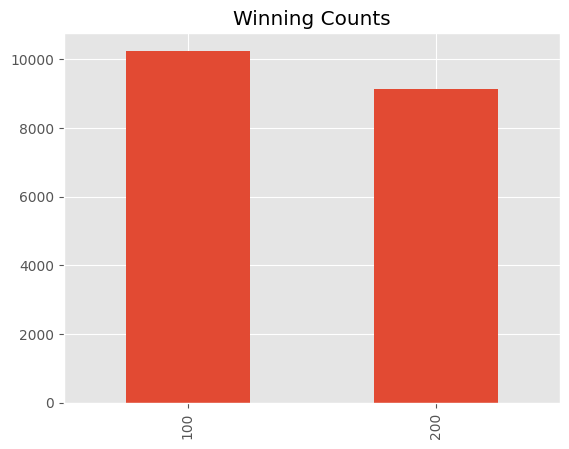

In [24]:
df['winningteam'].value_counts(sort=False).sort_index().plot(kind='bar', title='Winning Counts')

<ipython-input-25-3429f9d12eeb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

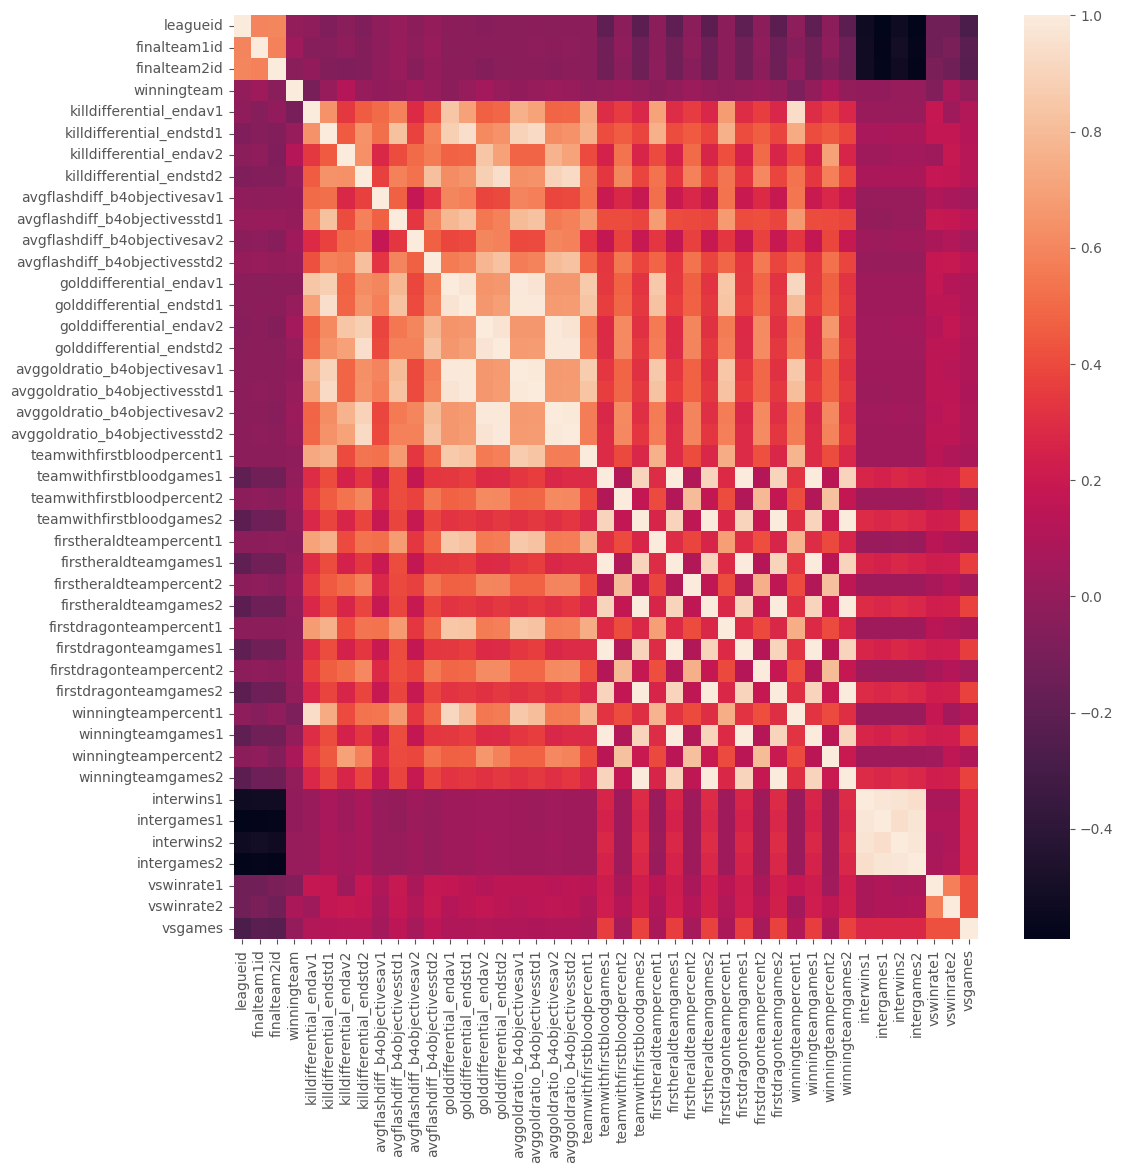

In [25]:
plt.figure(figsize=(12, 12))
df_corr = df.corr()
sns.heatmap(df_corr, annot=False)

In [26]:
df_corr[(abs(df_corr)>.9)]

,leagueid,finalteam1id,finalteam2id,winningteam,killdifferential_endav1,killdifferential_endstd1,killdifferential_endav2,killdifferential_endstd2,avgflashdiff_b4objectivesav1,avgflashdiff_b4objectivesstd1,avgflashdiff_b4objectivesav2,avgflashdiff_b4objectivesstd2,golddifferential_endav1,golddifferential_endstd1,golddifferential_endav2,golddifferential_endstd2,avggoldratio_b4objectivesav1,avggoldratio_b4objectivesstd1,avggoldratio_b4objectivesav2,avggoldratio_b4objectivesstd2,teamwithfirstbloodpercent1,teamwithfirstbloodgames1,teamwithfirstbloodpercent2,teamwithfirstbloodgames2,firstheraldteampercent1,firstheraldteamgames1,firstheraldteampercent2,firstheraldteamgames2,firstdragonteampercent1,firstdragonteamgames1,firstdragonteampercent2,firstdragonteamgames2,winningteampercent1,winningteamgames1,winningteampercent2,winningteamgames2,interwins1,intergames1,interwins2,intergames2,vswinrate1,vswinrate2,vsgames
leagueid,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
finalteam1id,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
finalteam2id,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winningteam,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
killdifferential_endav1,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.941915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
killdifferential_endstd1,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944390,NaN,NaN,NaN,0.930970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
killdifferential_endav2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
killdifferential_endstd2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944600,NaN,NaN,NaN,0.930893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avgflashdiff_b4objectivesav1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avgflashdiff_b4objectivesstd1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xgboost as xgb
import lightgbm as lgbm

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#df = pd.read_csv()

In [ ]:
target_dict = {100:1, 200:0}
df['winningteam'] = df['winningteam'].map(target_dict)

In [ ]:
df.info()

In [ ]:
X = df.drop(columns=['winningteam','finalteam1id', 'finalteam2id','platformgameid', 'gamedate',	'leagueid',	'leaguename',	'tournamentname','league1','league2'], axis=1)
y = df['winningteam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

In [ ]:
names = [
  "Random Forest",
  "Neural Net",
  "AdaBoost",
  "XGBoost",
  "LightGBM"
]

classifiers = [
  RandomForestClassifier(max_depth=8,
                         n_estimators=100,
                         min_samples_leaf=1,
                         max_features='sqrt'),
  MLPClassifier(alpha=1,
                max_iter=1000),
  AdaBoostClassifier(),
  xgb.XGBClassifier(colsample_bytree=0.8,
                    gamma=0.01, #min loss required to make further partition on leaf node of tree
                    learning_rate=0.05,
                    max_depth=3,
                    min_child_weight=1.5,
                    n_estimators=1000,
                    reg_alpha=0.4, #L1 Regularization
                    reg_lambda=0.8, #L2 Regularization
                    subsample=0.8, #sample ratio
                    nthread=-1),
  lgbm.LGBMClassifier(objective='binary',
                     num_leaves=5,
                     learning_rate=0.05,
                     n_estimators=1000,
                     max_bin=55,
                     bagging_fraction=0.8,
                     bagging_freq=5,
                     feature_fraction=0.8,
                     min_data_in_leaf=1)
]

In [ ]:
for name, clf in zip(names, classifiers):

  clf = Pipeline([('scaler', StandardScaler()), (name, clf)])
  clf.fit(X_train, y_train)

  target_names = ['team1_win','team2_win']

  y_pred_train = clf.predict(X_train)
  y_pred = clf.predict(X_test)
  print('Model: ', name)
  print('  Train:')
  print(classification_report(y_train, y_pred_train, target_names=target_names))
  print(' Test:')
  print(classification_report(y_test, y_pred, target_names=target_names))
  print('\n')

In [ ]:
importances = classifiers[0].feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
std = np.std([tree.feature_importances_ for tree in classifiers[0].estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
boosting_type  = ['gbdt', 'dart']
max_depth = [int(x) for x in np.linspace(start=1, stop=10, num=5)]
objective = ['binary']
num_leaves = [int(x) for x in np.linspace(start=1, stop=10, num=5)]
learning_rate = [x for x in np.linspace(start=0.01, stop=0.1, num=5)]
n_estimators = [x for x in np.linspace(start=600, stop=2000, num=5)]
max_bin = [30,50,70,1000]
bagging_fraction = [.7, .8, .9]
bagging_freq = [1,2,5,10]
feature_fraction = [.7,0.8,.9]
min_data_in_leaf = [int(x) for x in np.linspace(start=1, stop=20, num=5)]
reg_alpha = [0, 0.01, 0.001]
reg_lambda = [0, 0.01, 0.001]

In [ ]:
param_grid = {'boosting_type':boosting_type,
              'max_depth':max_depth,
              'objective':objective,
              'num_leaves':num_leaves,
              'learning_rate':learning_rate,
              'n_estimators':n_estimators,
              #'max_bin':max_bin,
              #'bagging_fraction':bagging_fraction,
              #'bagging_freq':bagging_freq,
              'feature_fraction':feature_fraction,
              'min_data_in_leaf':min_data_in_leaf,
              #'reg_alpha':reg_alpha,
              #'reg_lambda':reg_lambda}

In [ ]:
lgbm_Grid = GridSearchCV(estimator = classifiers[4],
                       param_grid = param_grid,
                       cv = 10,scoring ='roc_auc',
                       verbose=2,
                       n_jobs = 4)
lgbm_Grid.fit(X_train, y_train)

In [ ]:
lgbm_Model_best = classifiers[4].best_estimator_
prediction = lgbm_Model_best.predict(X_test)
print(classification_report(y_test, prediction, target_names=['team1_win', 'team2_win']))